In [19]:
import pandas as pd
import geopandas as gpd
import json
%matplotlib inline
import seaborn as sns
import numpy as np

In [111]:
et = gpd.read_file('5floor_buildings.geojson')

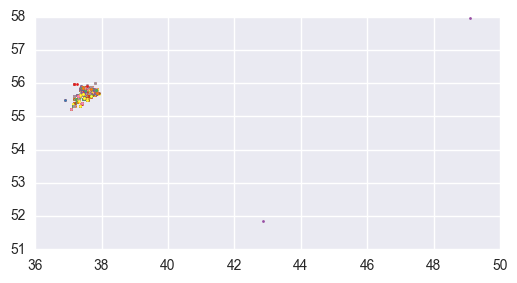

In [112]:
et['geometry'].plot()

In [113]:
et.columns = et.columns.str.lower()

In [114]:
et = et.replace([None], 'Не заполнено')

In [115]:
house_types = {'Многоквартирный дом': 'apartment house', 'Жилой дом блокированной застройки': 'residential house terraced house',
'Специализированный жилищный фонд':'Spesialized housing stock','Не заполнено':'unknown'}

In [116]:
et['house_type'] = et['house_type'].apply(lambda x: house_types[x])

In [117]:
et = et.rename(columns={'avar': 'critical_conditions', 'blag_playg': 'playground', 
                        'blag_sport': 'sportground', 'blag_other': 'outdoor_facilities','doors':'porch_count',
                       'room_cou_1':'room_residential_count','room_cou_2':'room_nonresidential_count',
                       'area_nonli': 'area_nonlive', 'room_count': 'room_total_count','area_park':'area_parking',
                       'servicedat': 'service_last_date'})

In [118]:
et['area_parking'] = et['area_parking'].replace('Не заполнено','-1')

In [119]:
et['area_land'] = et['area_land'].replace('Незаполнено','-1')

In [120]:
et['service_last_date'] = et['service_last_date'].replace('Не заполнено','-1')

In [121]:
playground = {'Не имеется': 0, 'Имеется':1, 'Не заполнено':'-1'}
et['playground'] = et['playground'].apply(lambda x: playground[x])

In [122]:
et['sportground'] = et['sportground'].apply(lambda x: playground[x])

In [123]:
critical_conditions = {'Нет': 0, 'Да':1,'Не заполнено':'-1'}
et['critical_conditions'] = et['critical_conditions'].apply(lambda x: critical_conditions[x])

In [148]:
processed_et = et[['house_id','house_type','levels_max','geometry','area', 'area_land','area_live', 'area_nonlive','area_parking', 
    'critical_conditions', 'playground', 'sportground', 'room_residential_count', 'room_nonresidential_count',
       'room_total_count','service_last_date','year']]

In [149]:
processed_et.columns

Index(['house_id', 'house_type', 'levels_max', 'geometry', 'area', 'area_land',
       'area_live', 'area_nonlive', 'area_parking', 'critical_conditions',
       'playground', 'sportground', 'room_residential_count',
       'room_nonresidential_count', 'room_total_count', 'service_last_date',
       'year'],
      dtype='object')

In [150]:
processed_et = processed_et.replace('Не заполнено', -1)

In [151]:
processed_et = processed_et.replace('Незаполнено', -1)

In [152]:
processed_et['year'] = processed_et['year'].astype(float)

In [153]:
processed_et['house_id'] = processed_et['house_id'].astype(int)

In [154]:
processed_et['room_total_count'] = processed_et['room_total_count'].apply(lambda x: str(x).replace(' ', ''))

In [155]:
processed_et['room_residential_count'] = processed_et['room_residential_count'].apply(lambda x: str(x).replace(' ', ''))

In [156]:
processed_et['room_nonresidential_count'] = processed_et['room_nonresidential_count'].apply(lambda x: str(x).replace(' ', ''))

In [157]:
processed_et.loc[:,'area':'room_total_count'] = processed_et.loc[:,'area':'room_total_count'].astype(float)

In [184]:
processed_et['service_year'] = processed_et['service_last_date'].apply(lambda x: int(x.split('.')[-1]))

In [177]:
processed_et['service_day'] = processed_et['service_last_date'].apply(lambda x: int(x.split('.')[0]))

In [178]:
processed_et['levels_max'] = processed_et['levels_max'].apply(lambda x: int(x))

In [179]:
def get_month(x):
    if x == '-1':
        return -1
    else:
        return int(x.split('.')[1])

processed_et['service_month'] = processed_et['service_last_date'].apply(lambda x: get_month(str(x)))

In [185]:
processed_et.dtypes

house_id                       int64
house_type                    object
levels_max                     int64
geometry                      object
area                         float64
area_land                    float64
area_live                    float64
area_nonlive                 float64
area_parking                 float64
critical_conditions          float64
playground                   float64
sportground                  float64
room_residential_count       float64
room_nonresidential_count    float64
room_total_count             float64
service_last_date             object
year                         float64
service_year                   int64
service_day                    int64
service_month                  int64
dtype: object

In [196]:
cleaned = processed_et[(processed_et.year >= 1956) & (processed_et.year < 1986)]

In [197]:
cleaned = cleaned.replace('-1', np.nan)

In [199]:
cleaned.levels_max.value_counts()

5     7781
1        3
6        2
0        2
7        1
3        1
12       1
Name: levels_max, dtype: int64

In [195]:
with open('Khrushchevki_data.geojson', 'w') as f:
    f.write(cleaned.to_json())

In [232]:
z = {**x, **y}

SyntaxError: invalid syntax (<ipython-input-232-20917de627df>, line 1)

In [230]:
z = dict(x, **y)

In [231]:
z

{'a': 1, 'b': 3, 'c': 4}

In [7]:
et.columns

Index(['address', 'area', 'area_gen', 'area_land', 'area_live', 'area_nonli',
       'area_park', 'avar', 'blag_other', 'blag_playg', 'blag_sport', 'cadno',
       'capfond', 'cold_water', 'doors', 'energy_cla', 'fias', 'geometry',
       'hot_water', 'house_id', 'house_type', 'id', 'lastupdate', 'lat',
       'levels_max', 'levels_min', 'lon', 'mgmt_com_1', 'mgmt_compa', 'other',
       'room_cou_1', 'room_cou_2', 'room_count', 'serie', 'servicedat',
       'year'],
      dtype='object')

In [14]:
et[et.year >'1990']

,address,area,area_gen,area_land,area_live,area_nonli,area_park,avar,blag_other,blag_playg,...,lon,mgmt_com_1,mgmt_compa,other,room_cou_1,room_cou_2,room_count,serie,servicedat,year
542,"г. Москва, ул. Лавочкина, д. 34",60096.00,Незаполнено,Незаполнено,Незаполнено,Незаполнено,Незаполнено,Нет,Не заполнено,Имеется,...,37.493919,http://www.reformagkh.ru/mymanager/profile/770...,"ТСЖ ""Янтарный""",Не заполнено,478,8,486,Не заполнено,16.11.2004,2002
751,"г. Москва, проезд. Дмитровский, д. 4, к. 2",3886.80,Незаполнено,4467.00,2087.30,1799.50,Незаполнено,Нет,Не заполнено,Не имеется,...,37.577094,http://www.reformagkh.ru/mymanager/profile/893...,"ГБУ""Жилищник Тимирязевского района""",Не заполнено,64,0,64,индивидуальный,27.04.2016,2016
973,"г. Москва, ул. Долгопрудная, д. 10",3188.00,1307.00,838.00,3188.00,0.00,720.00,Нет,нет,Имеется,...,37.539051,http://www.reformagkh.ru/mymanager/profile/755...,"ГБУ ""Жилищник Дмитровского района""",нет,75,0,75,"I-515, панельный",01.01.2007,1996
1692,"г. Москва, ул. Угличская, д. 15, к. 1",3340.00,1494.00,0.00,1846.00,0.00,0.00,Нет,Не заполнено,Не имеется,...,37.566422,http://www.reformagkh.ru/mymanager/profile/892...,"ГБУ ""Жилищник района Лианозово""",Не заполнено,22,0,22,Индивидуальный,25.10.2006,2000
1920,"г. Москва, п. Щаповское, п. Курилово, ул. Лесн...",6329.60,6329.60,0.00,3598.40,0.00,0.00,Нет,нет,Не имеется,...,37.382537,http://www.reformagkh.ru/mymanager/profile/823...,"ООО ""УК Шишкин Лес""",нет,120,0,120,нет,01.10.2013,1994
1932,"г. Москва, п. Щаповское, п. Щапово, д. 48",1693.40,1693.40,0.00,1000.30,0.00,0.00,Нет,нет,Не имеется,...,37.404690,http://www.reformagkh.ru/mymanager/profile/823...,"ООО ""УК Шишкин Лес""",нет,34,0,34,нет,01.10.2013,2004
1933,"г. Москва, п. Щаповское, п. Щапово, д. 49",2024.00,2024.00,0.00,1161.30,0.00,0.00,Нет,нет,Не имеется,...,37.403612,http://www.reformagkh.ru/mymanager/profile/823...,"ООО ""УК Шишкин Лес""",нет,40,0,40,нет,01.10.2013,2008
1950,"г. Москва, п. Михайлово-Ярцевское, п. Шишкин Л...",6454.90,6454.90,0.00,3616.80,0.00,0.00,Нет,нет,Не имеется,...,37.187854,http://www.reformagkh.ru/mymanager/profile/823...,"ООО ""УК Шишкин Лес""",нет,120,0,120,нет,01.04.2012,1995
1966,"г. Москва, п. Первомайское, п. Птичное, ул. Ле...",4687.00,0.00,0.00,4687.00,0.00,0.00,Нет,Не заполнено,Не имеется,...,37.228009,http://www.reformagkh.ru/mymanager/profile/893...,"ООО ""КАПИТАЛИНВЕСТ""",Не заполнено,80,0,80,индивидуальный,01.06.2016,1998
1972,"г. Москва, п. Первомайское, п. Птичное, ул. Це...",2783.00,0.00,0.00,2783.00,0.00,0.00,Нет,Не заполнено,Не имеется,...,37.228431,http://www.reformagkh.ru/mymanager/profile/893...,"ООО ""КАПИТАЛИНВЕСТ""",Не заполнено,60,0,60,-,01.06.2016,1995


In [144]:
processed_et

,area,area_land,area_live,area_nonlive,area_parking,critical_conditions,geometry,house_id,house_type,id,playground,room_nonresidential_count,room_residential_count,room_total_count,service_day,service_last_date,service_month,service_year,sportground,year
0,4688.10,0.0,3722.90,965.20,0.0,0.0,POINT (37.52377 55.818372),7840091,apartment house,0,0.0,0.0,0.0,56.0,01,01.03.2010,3,2010,0.0,1959
1,1882.60,0.0,1882.60,0.00,0.0,0.0,POINT (37.524758 55.818437),7840108,apartment house,1,0.0,0.0,0.0,45.0,01,01.03.2010,3,2010,0.0,1965
2,4480.60,0.0,4333.00,147.60,0.0,0.0,POINT (37.526214 55.818488),7840136,apartment house,2,0.0,0.0,0.0,50.0,01,01.03.2010,3,2010,0.0,1957
3,4018.80,0.0,4018.80,0.00,0.0,0.0,POINT (37.524875 55.818923),7840164,apartment house,3,0.0,0.0,0.0,75.0,01,01.03.2010,3,2010,0.0,1960
4,3395.40,0.0,3395.40,826.76,0.0,0.0,POINT (37.524722 55.821006),7840200,apartment house,4,0.0,0.0,80.0,80.0,01,01.03.2010,3,2010,0.0,1960
5,4142.20,0.0,4142.20,0.00,0.0,0.0,POINT (37.525477 55.819742),7839577,apartment house,5,0.0,0.0,100.0,100.0,01,01.03.2010,3,2010,0.0,1961
6,4970.40,0.0,4433.60,536.80,0.0,0.0,POINT (37.525872 55.820683),7839598,apartment house,6,0.0,0.0,107.0,107.0,01,01.03.2010,3,2010,0.0,1961
7,2499.40,0.0,2499.40,0.00,0.0,0.0,POINT (37.526977 55.821183),7839621,apartment house,7,0.0,0.0,60.0,60.0,01,01.03.2010,3,2010,0.0,1963
8,1759.00,0.0,1568.30,6.70,0.0,0.0,POINT (37.526223 55.823879),7839641,apartment house,8,0.0,0.0,40.0,40.0,01,01.05.2015,5,2015,0.0,1959
9,2551.80,0.0,2481.50,70.30,0.0,0.0,POINT (37.527471 55.821694),7839696,apartment house,9,0.0,0.0,60.0,60.0,01,01.03.2010,3,2010,0.0,1960
